# Alzheimer Diagnosis using Machine Learning Algorithms and Neural Networks
## Alzheimer's Disease: A Global Challenge

Alzheimer's disease is a neurodegenerative disorder that affects memory, behavior, and cognition in millions of people worldwide. It is also the leading cause of dementia globally. It is estimated that around 65% of the nearly 55 million dementia patients worldwide have Alzheimer's. This disorder can also lead to depression, social isolation, aggression, disorientation, and delusions.

The aging population, especially in highly populated countries like China and India, contributes to the growing number of Alzheimer's cases over time. Dementia cases are expected to double every 20 years and reach 139 million globally by 2050. In 2015, the economic impact of dementia was 818 billion dollars, which represented 1.09% of the global GDP. By 2030, this cost is expected to rise to 2.8 trillion dollars.

Early diagnosis of Alzheimer's is rare. In wealthy countries, only 20% to 50% of dementia patients receive a diagnosis in the early stages of the disease. In developing or underdeveloped countries, the situation is even worse. In India, for example, it is estimated that 90% of dementia patients are unaware of their condition. Globally, 75% of affected individuals have not been diagnosed.

Although there is no cure for Alzheimer's, early identification can significantly benefit patients. The life expectancy of a person with Alzheimer's is 3 to 11 years. However, if the disease is treated in its early stages, this time can be extended up to 20 years. Additionally, the economic impact is mitigated, with potential savings of up to 231 billion dollars by 2050.

The goal of this project is to develop a **Machine Learning algorithm** capable of accurately predicting Alzheimer’s disease diagnosis using health indicators. To achieve this, I will utilize a dataset available on Kaggle: [Alzheimer's Disease Dataset](https://www.kaggle.com/dsv/8668279) (Rabie El Kharoua, 2024)【@misc{rabie_el_kharoua_2024, title={Alzheimer's Disease Dataset}, url={https://www.kaggle.com/dsv/8668279}, DOI={10.34740/KAGGLE/DSV/8668279}, publisher={Kaggle}, author={Rabie El Kharoua}, year={2024}}】.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow.keras as kr
from keras import regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler

First, I made a DataFrame (DF_Alzheimer)

In [2]:
file_path = r"C:\Users\Dell\Desktop\jp\files\alzheimers_disease_data.csv"
DF_Alzheimer = pd.read_csv(file_path, index_col=0)
DF_Alzheimer.drop(columns="DoctorInCharge", inplace=True)
print(DF_Alzheimer.columns)

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivityScore', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')


**Description of Features**

**Patient Information**

Patient ID

PatientID: A unique identifier assigned to each patient (4751 to 6900).

**Demographic Details**

Age: The age of the patients ranges from 60 to 90 years.

Gender: Gender of the patients, where 0 represents Male and 1 represents Female.

Ethnicity: The ethnicity of the patients, coded as follows:

0: Caucasian
1: African American
2: Asian
3: Other

EducationLevel: The education level of the patients, coded as follows:
0: None
1: High School
2: Bachelor's
3: Higher

**Lifestyle Factors**

BMI: Body Mass Index of the patients, ranging from 15 to 40.

Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.

AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.

PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.

DietQuality: Diet quality score, ranging from 0 to 10.

SleepQuality: Sleep quality score, ranging from 4 to 10.

**Medical History**

FamilyHistoryAlzheimers: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

CardiovascularDisease: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.

Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.

Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.

HeadInjury: History of head injury, where 0 indicates No and 1 indicates Yes.

Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.

**Clinical Measurements**

SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.

DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.

CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.

CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.

CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.

CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.

**Cognitive and Functional Assessments**

MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.

FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.

MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.

BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.

ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.

**Symptoms**

Confusion: Presence of confusion, where 0 indicates No and 1 indicates Yes.

Disorientation: Presence of disorientation, where 0 indicates No and 1 indicates Yes.

PersonalityChanges: Presence of personality changes, where 0 indicates No and 1 indicates Yes.

DifficultyCompletingTasks: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.

Forgetfulness: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.

**Diagnosis Information**

Diagnosis: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

**Scaling**

This cell scales and normalizes features in the `DF_Alzheimer` DataFrame to prepare them for modeling. Continuous variables like `Age`, cholesterol levels, blood pressure, BMI, and alcohol consumption are standardized using MinMaxScaler or StandardScaler. Log transformation is applied to `Age`, while scores like physical activity, MMSE, functional assessment, ADL, diet quality, and sleep quality are normalized to their respective scales for consistency. 

In [3]:
scaler = MinMaxScaler()
DF_Alzheimer["Age_scaled"] = scaler.fit_transform(DF_Alzheimer[["Age"]])
scaler = StandardScaler()
DF_Alzheimer["Cholesterol_scaled"] = scaler.fit_transform(DF_Alzheimer[["CholesterolTotal"]])
DF_Alzheimer["Triglycerides_scaled"] = scaler.fit_transform(DF_Alzheimer[["CholesterolTriglycerides"]])
DF_Alzheimer["LDL_scaled"] = scaler.fit_transform(DF_Alzheimer[["CholesterolLDL"]])
DF_Alzheimer["HDL_scaled"] = scaler.fit_transform(DF_Alzheimer[["CholesterolHDL"]])
DF_Alzheimer["SystolicBP_scaled"] = scaler.fit_transform(DF_Alzheimer[["SystolicBP"]])
DF_Alzheimer["DiastolicBP_scaled"] = scaler.fit_transform(DF_Alzheimer[["DiastolicBP"]])
DF_Alzheimer["BMI_scaled"] = scaler.fit_transform(DF_Alzheimer[["BMI"]])
DF_Alzheimer["Alcohol_scaled"] = scaler.fit_transform(DF_Alzheimer[["AlcoholConsumption"]])
DF_Alzheimer["Age_log"] = np.log(DF_Alzheimer["Age"])
DF_Alzheimer["Exercise_scaled"] = DF_Alzheimer["PhysicalActivityScore"] / 10  
DF_Alzheimer["MMSE_scaled"] = DF_Alzheimer["MMSE"] / 30   #Score ranging from 0 to 30
DF_Alzheimer["FunctionalAssessment_scaled"] = DF_Alzheimer["FunctionalAssessment"] / 10 #Score ranging from 0 to 10
DF_Alzheimer["ADL_scaled"] = DF_Alzheimer["ADL"] / 10   
DF_Alzheimer["DietQuality_Scaled"] = DF_Alzheimer["DietQuality"] / 10 
DF_Alzheimer["SleepQuality_Scaled"] = DF_Alzheimer["SleepQuality"] / 10  

**Feature Engineering**

This cell creates binary indicators and derived features in the `DF_Alzheimer` DataFrame for health and demographic categorization. Conditions like hypertension, low physical activity, high alcohol consumption, poor sleep, unhealthy diet, low ADL, high cholesterol, and low education are represented as binary variables (1 if the condition is met, otherwise 0). Advanced age is labeled for individuals older than 65 (based on log-transformed age), and ethnicity is grouped into two categories. Additionally, scaled MMSE scores are used to indicate high cognitive performance, and a composite Alzheimer indicator is calculated by averaging scaled MMSE, functional assessment, and ADL scores.

In [4]:
DF_Alzheimer["Hypertension"] = np.where((DF_Alzheimer["DiastolicBP"] > 80), 1, 0)
DF_Alzheimer["Low_Physical_Activity"] = np.where((DF_Alzheimer["PhysicalActivityScore"] > 5), 1, 0)
DF_Alzheimer["High_Alcohol_Consumption"] = np.where((DF_Alzheimer["AlcoholConsumption"] > 15), 1, 0)
DF_Alzheimer["Poor_Sleep"] = np.where((DF_Alzheimer["SleepQuality"] > 5), 1, 0)
DF_Alzheimer["Unhealthy_Diet"] = np.where((DF_Alzheimer["DietQuality"] > 5), 1, 0)
DF_Alzheimer["Low_ADL"] = np.where((DF_Alzheimer["ADL"] < 5), 1, 0)
DF_Alzheimer["High_Cholesterol"] = np.where((DF_Alzheimer["CholesterolLDL"] > 160), 1, 0)
DF_Alzheimer["Low_Education"] = np.where((DF_Alzheimer["EducationLevel"] < 2), 1, 0)
DF_Alzheimer["Ethnicity_Group_1"] = np.where((DF_Alzheimer["Ethnicity"] <= 1), 1, 0)
DF_Alzheimer["Advanced_Age"] = (DF_Alzheimer['Age_log'] > np.log(65)).astype(int)
DF_Alzheimer["High_MMSE"] = (DF_Alzheimer['MMSE_scaled'] > 0.8).astype(int)
DF_Alzheimer["Alzheimer_indicators"] = (DF_Alzheimer["MMSE_scaled"] + DF_Alzheimer["FunctionalAssessment_scaled"] + DF_Alzheimer["ADL_scaled"]) / 4

**Health Score**

This cell creates a new feature, `Health_Score`, in the `DF_Alzheimer` DataFrame by summing the binary indicators of various health factors (such as cardiovascular disease, head injury, hypertension, memory complaints, low ADL, smoking, unhealthy diet, low physical activity, and personality changes) and dividing the result by 10. This score reflects the proportion of health risks present for each individual, with a higher value indicating a greater number of health-related concerns.

In [5]:
DF_Alzheimer["Health_Score"] = (
    (DF_Alzheimer["CardiovascularDisease"] == 1).astype(int) +
    (DF_Alzheimer["HeadInjury"] == 1).astype(int) +
    (DF_Alzheimer["Hypertension"] == 1).astype(int) +
    (DF_Alzheimer["DifficultyCompletingTasks"] == 1).astype(int) +
    (DF_Alzheimer["MemoryComplaints"] == 1).astype(int) +
    (DF_Alzheimer["Low_ADL"] == 1).astype(int) +
    (DF_Alzheimer["Smoking"] == 1).astype(int) +
    (DF_Alzheimer["Unhealthy_Diet"] == 1).astype(int) +
    (DF_Alzheimer["Low_Physical_Activity"] == 1).astype(int) +
    (DF_Alzheimer["PersonalityChanges"] == 1).astype(int)
) / 10

**Cognitive Health Score**

This cell creates a `Cognitive_Health_Score` by averaging binary indicators for cognitive symptoms such as forgetfulness, difficulty completing tasks, personality changes, and disorientation, with a higher score indicating more cognitive health concerns.

In [6]:
DF_Alzheimer["Cognitive_Health_Score"] = (
    (DF_Alzheimer["Forgetfulness"] == 1).astype(int) +
    (DF_Alzheimer["DifficultyCompletingTasks"] == 1).astype(int) +
    (DF_Alzheimer["PersonalityChanges"] == 1).astype(int) +
    (DF_Alzheimer["Disorientation"] == 1).astype(int)
) / 4

**Combined Features**

This cell creates multiple new features in the `DF_Alzheimer` DataFrame to assess various health aspects. The `Lifestyle_Quality` is calculated by multiplying scaled diet and sleep quality scores. The `Cognitive_Score` averages MMSE, functional assessment, and memory complaints. `Physical_Health` is the mean of scaled cholesterol and blood pressure levels. The `Lifestyle` score is derived by calculating the Euclidean norm of BMI, alcohol consumption, physical activity, sleep quality, and diet quality. Other derived features include `MedicalHistory` (sum of health conditions), `Symptoms` (Euclidean norm of MMSE, ADL, and functional assessment), and several interactions like `Age_squared`, `BMI_Age`, and `Cholesterol_Index`. Additional health indicators are computed, such as `Systolic_to_Diastolic`, `HealthIndex`, `Physical_Health_Score`, `Cognitive_Risk`, `Health_Impact`, `Age_Interaction`, and `Lifestyle_Factor`.

In [7]:
DF_Alzheimer["Lifestyle_Quality"] = DF_Alzheimer["DietQuality_Scaled"] * DF_Alzheimer["SleepQuality_Scaled"]
DF_Alzheimer["Cognitive_Score"] = DF_Alzheimer[["MMSE_scaled", "FunctionalAssessment_scaled", "MemoryComplaints"]].mean(axis=1)
DF_Alzheimer["Physical_Health"] = DF_Alzheimer[["Cholesterol_scaled", "SystolicBP_scaled", "DiastolicBP_scaled"]].mean(axis=1)
DF_Alzheimer["Lifestyle"] = np.sqrt(DF_Alzheimer["BMI"]**2+DF_Alzheimer["AlcoholConsumption"]**2+DF_Alzheimer["PhysicalActivityScore"]**2+DF_Alzheimer["SleepQuality"]**2+DF_Alzheimer["DietQuality"]**2)
DF_Alzheimer["MedicalHistory"] = DF_Alzheimer["CardiovascularDisease"] + DF_Alzheimer["Diabetes"] + DF_Alzheimer["Depression"] + DF_Alzheimer["HeadInjury"] + DF_Alzheimer["Hypertension"] + DF_Alzheimer["FamilyHistoryAlzheimers"]
DF_Alzheimer["Symptoms"] = np.sqrt(DF_Alzheimer["MMSE"]**2+DF_Alzheimer["ADL"]**2+DF_Alzheimer["FunctionalAssessment"]**2)
DF_Alzheimer["Age_squared"] = DF_Alzheimer["Age"]**2
DF_Alzheimer["BMI_Age"] = DF_Alzheimer["BMI"] * DF_Alzheimer["Age"]
DF_Alzheimer["Cholesterol_Index"] = DF_Alzheimer["CholesterolTotal"] / DF_Alzheimer["CholesterolHDL"]
DF_Alzheimer["Systolic_to_Diastolic"] = DF_Alzheimer["SystolicBP"] / DF_Alzheimer["DiastolicBP"]
DF_Alzheimer["HealthIndex"] = DF_Alzheimer["BMI"] * DF_Alzheimer["Smoking"] * DF_Alzheimer["AlcoholConsumption"]
DF_Alzheimer["Physical_Health_Score"] = DF_Alzheimer["PhysicalActivityScore"] * DF_Alzheimer["DietQuality"]
DF_Alzheimer["Cognitive_Risk"] = DF_Alzheimer["MMSE"] * DF_Alzheimer["Depression"] * DF_Alzheimer["MemoryComplaints"]
DF_Alzheimer["Health_Impact"] = DF_Alzheimer["Hypertension"] + DF_Alzheimer["Diabetes"] + DF_Alzheimer["CardiovascularDisease"]
DF_Alzheimer["Age_Interaction"] = DF_Alzheimer["Age"] * DF_Alzheimer["EducationLevel"]
DF_Alzheimer["Lifestyle_Factor"] = DF_Alzheimer["PhysicalActivityScore"] + DF_Alzheimer["DietQuality"] + DF_Alzheimer["SleepQuality"]

**Finding Relationships with Graphing**

To visualize the relationships between the features in `DF_Alzheimer` and the Alzheimer's diagnosis, I created plots comparing both numerical and binary features with the diagnosis label. For binary features, I used bar plots to show the distribution of each feature relative to the diagnosis, while for numerical features, I employed hexbin plots to visualize the density of data points across different value ranges.

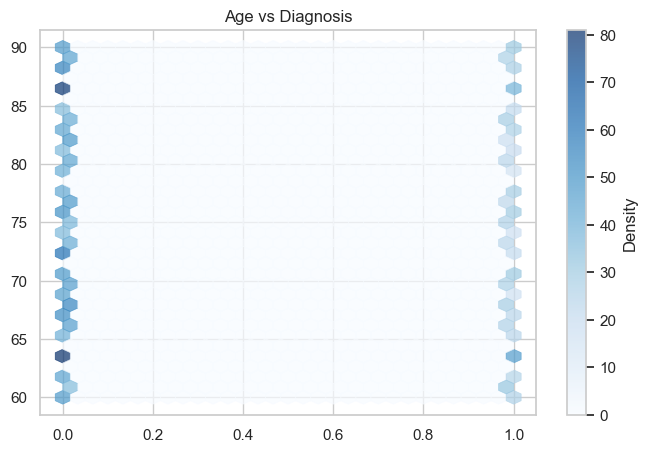

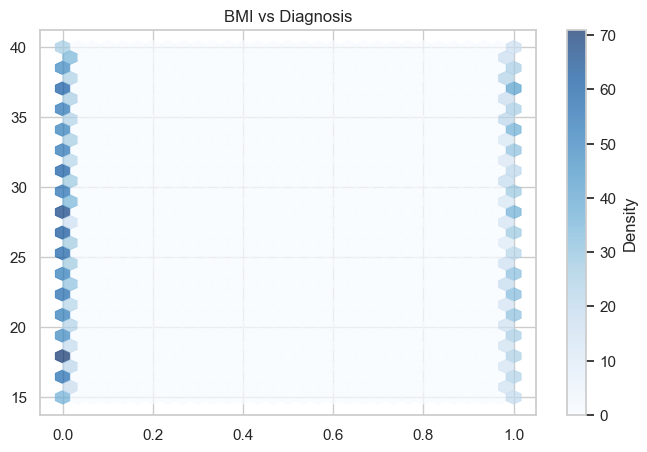

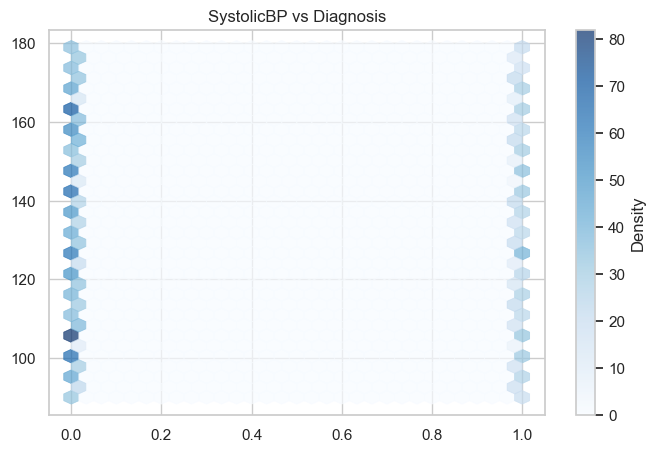

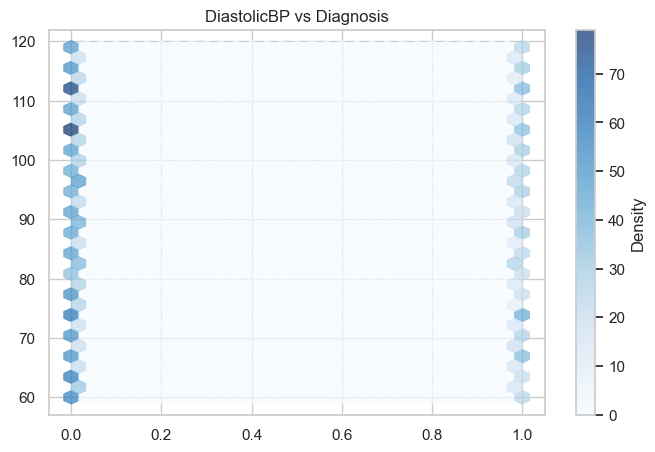

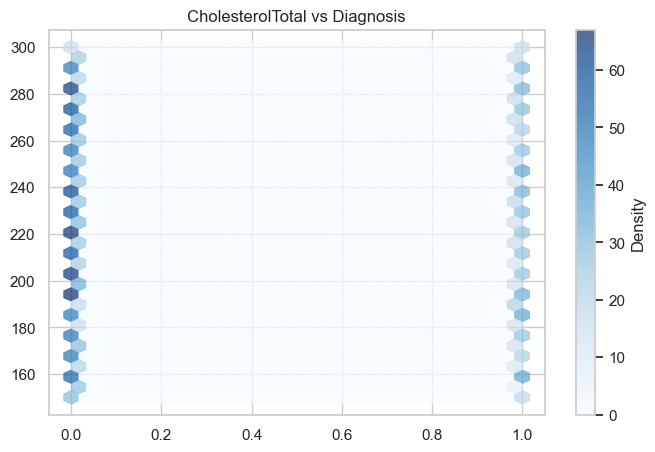

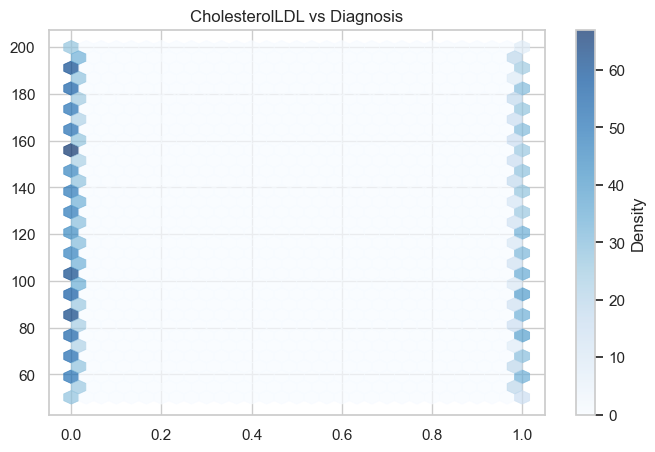

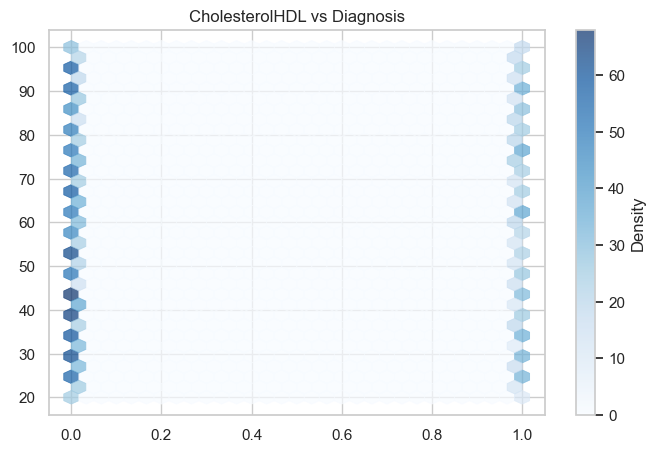

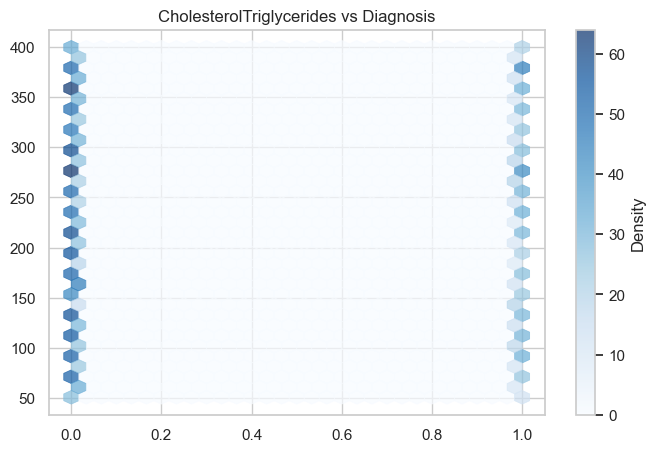

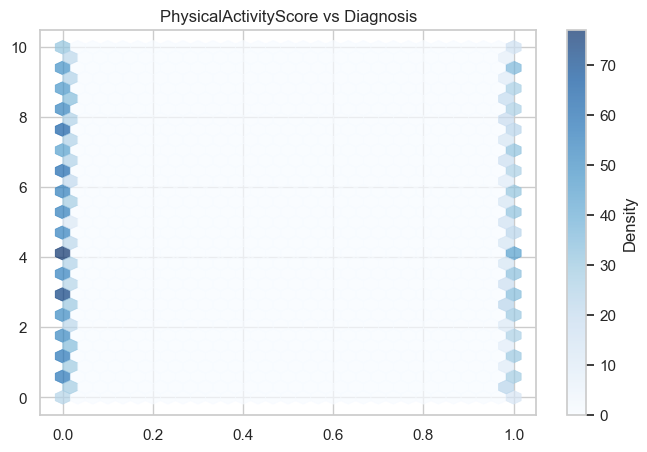

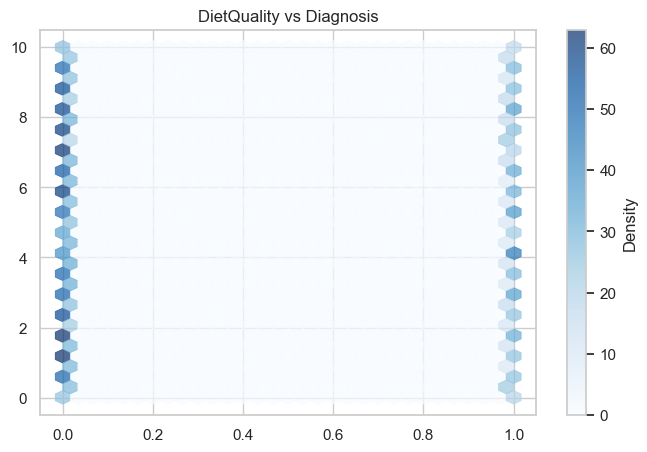

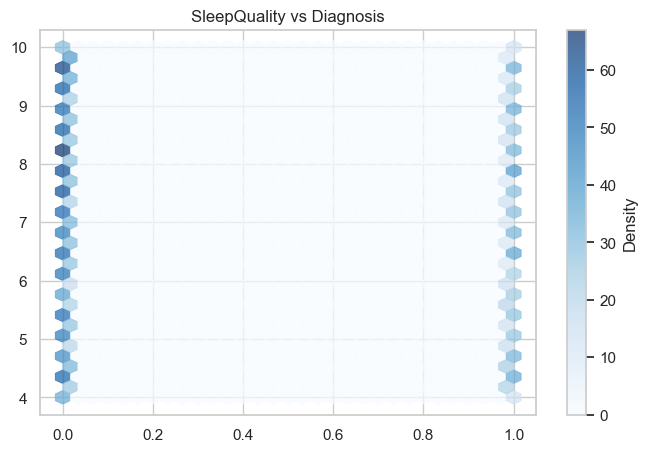

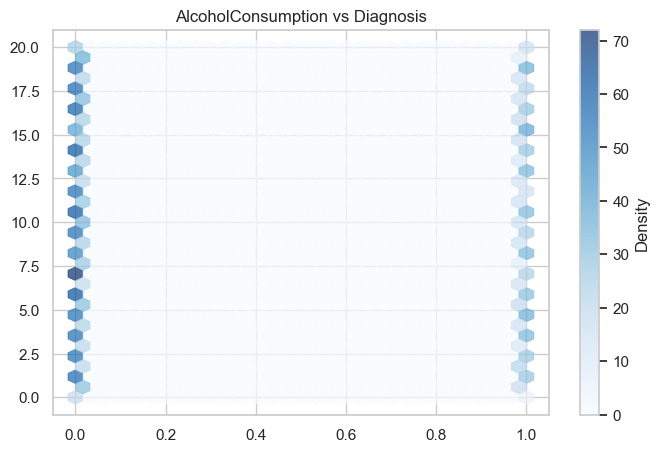

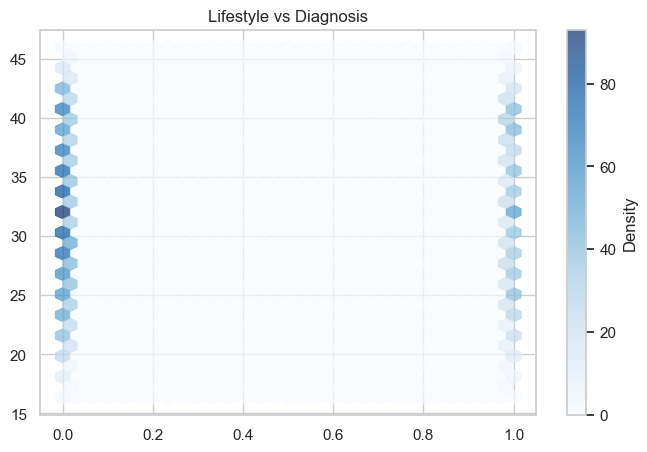

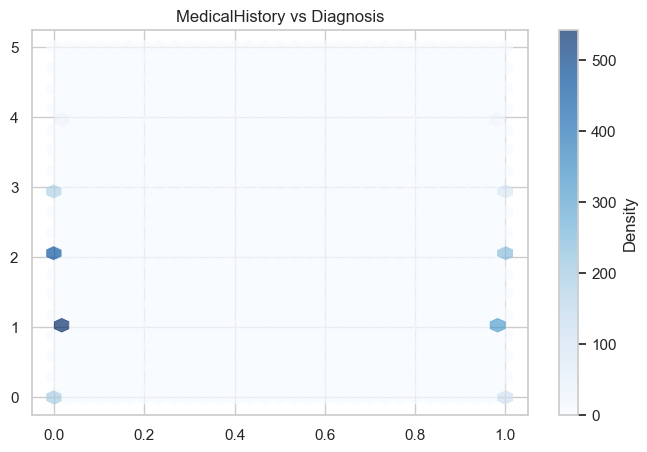

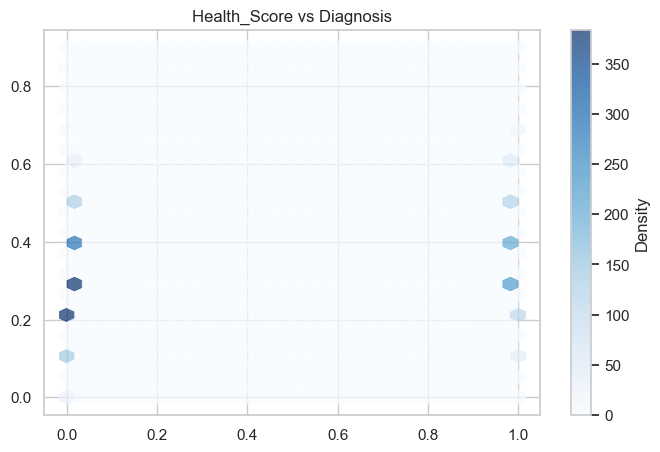

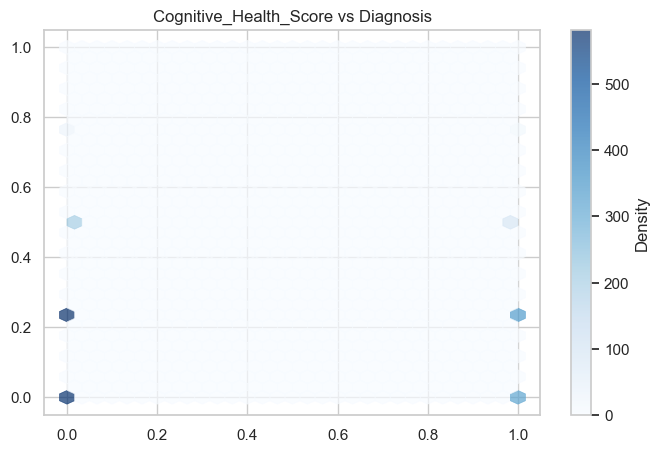

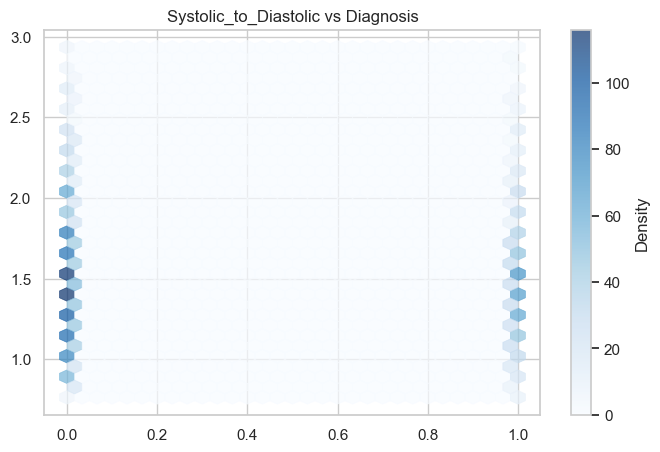

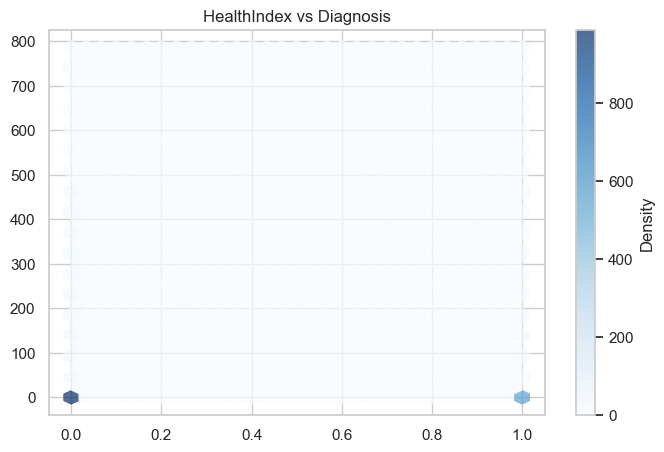

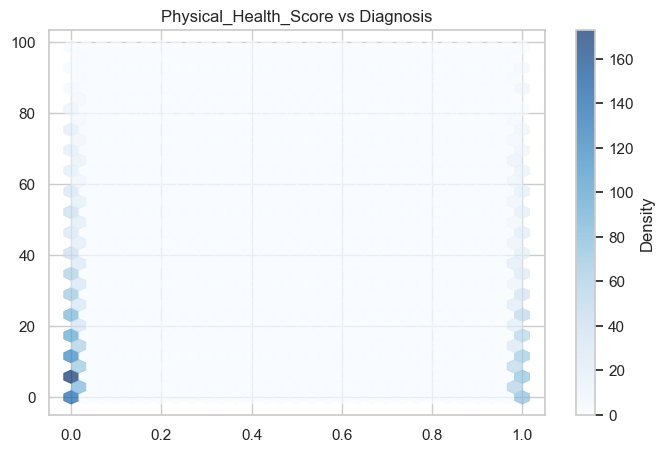

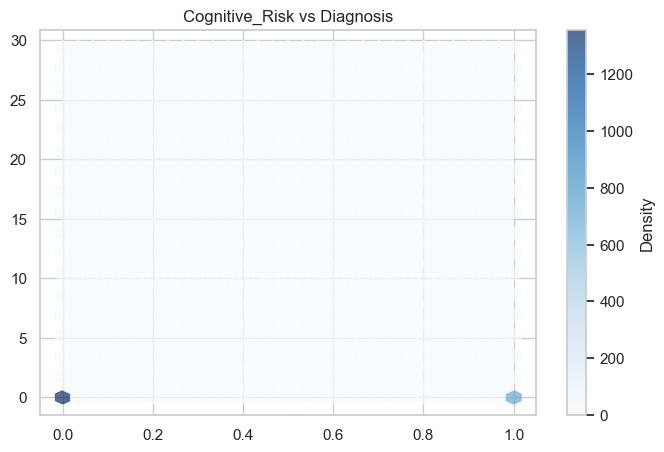

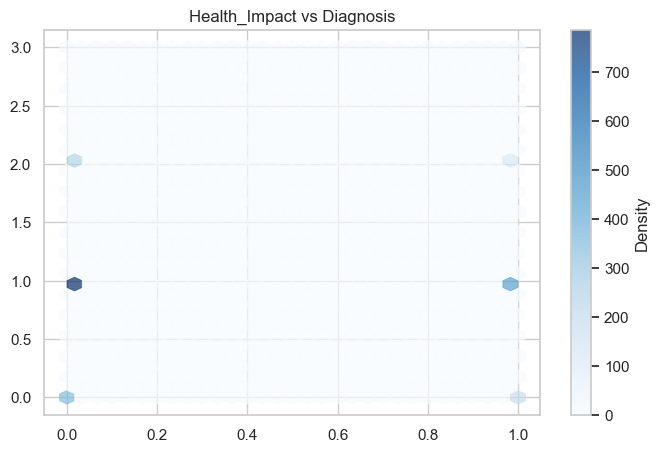

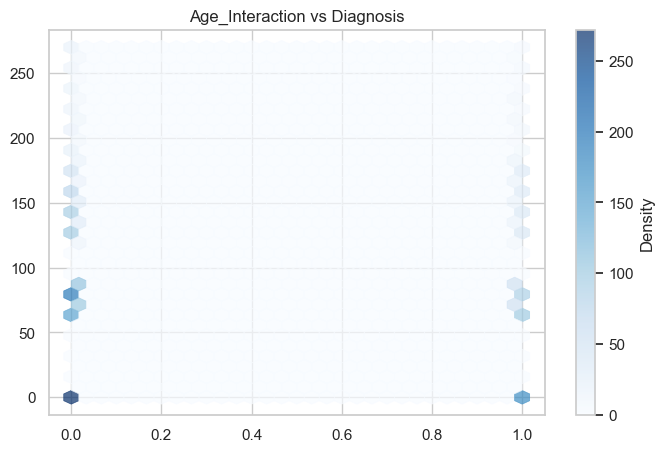

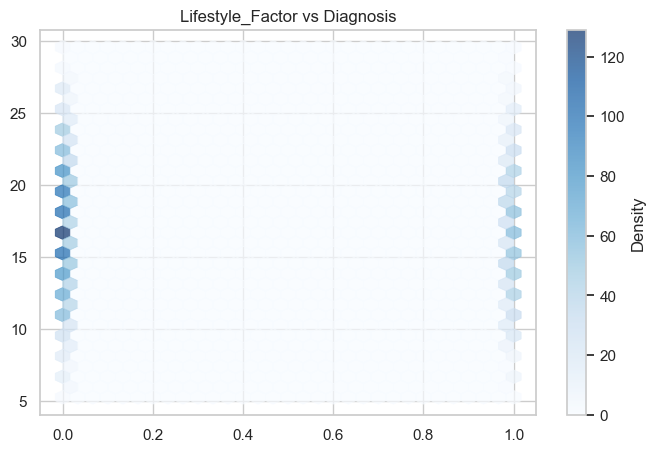

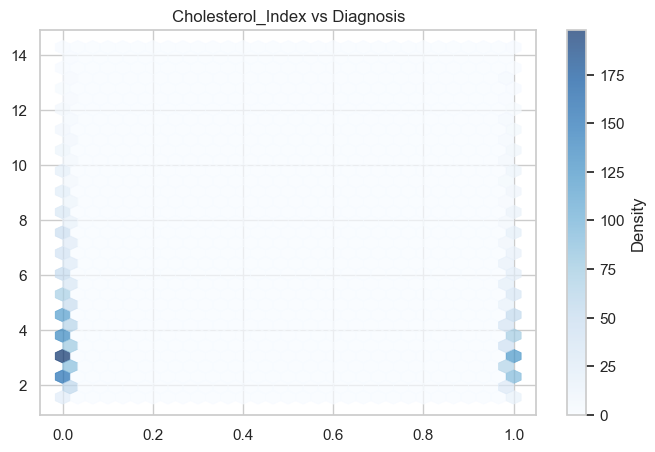

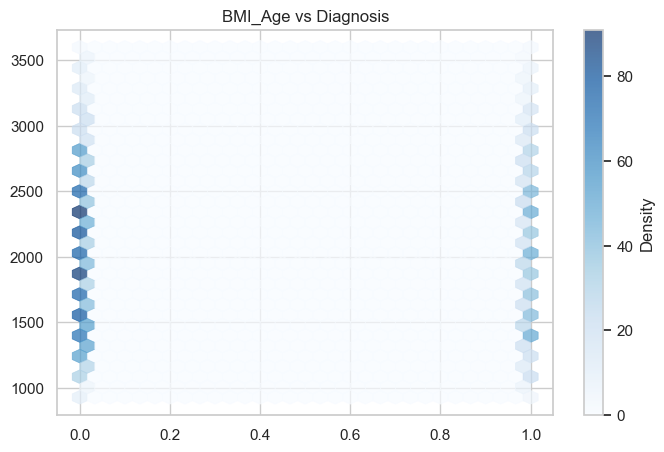

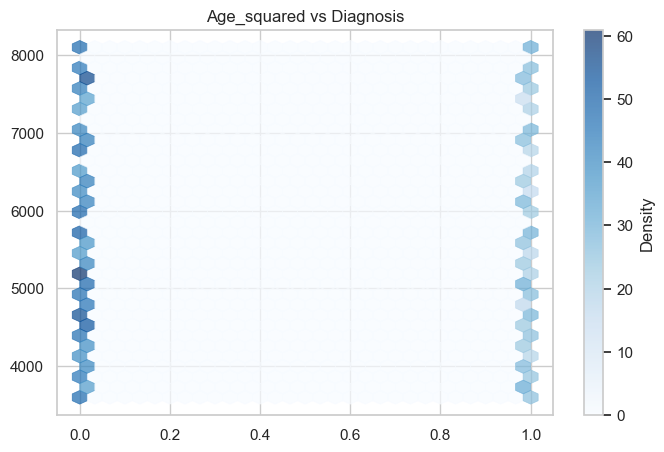

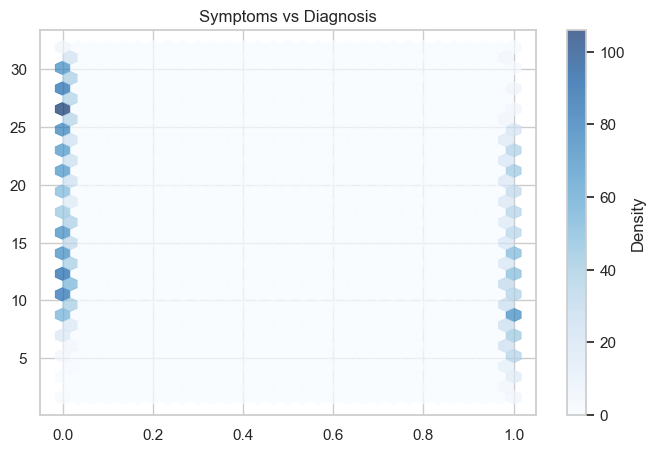

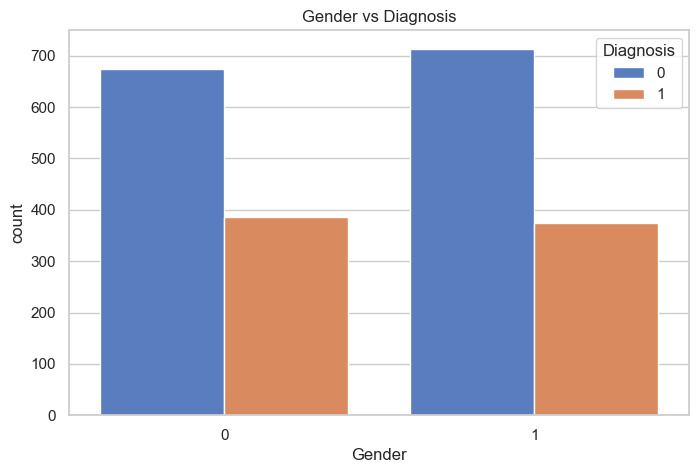

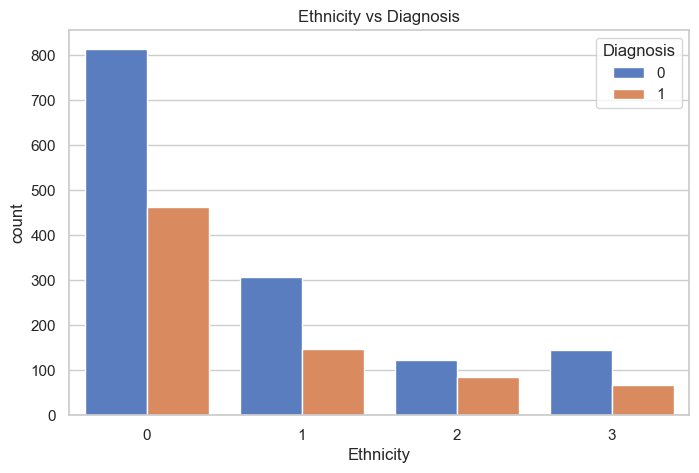

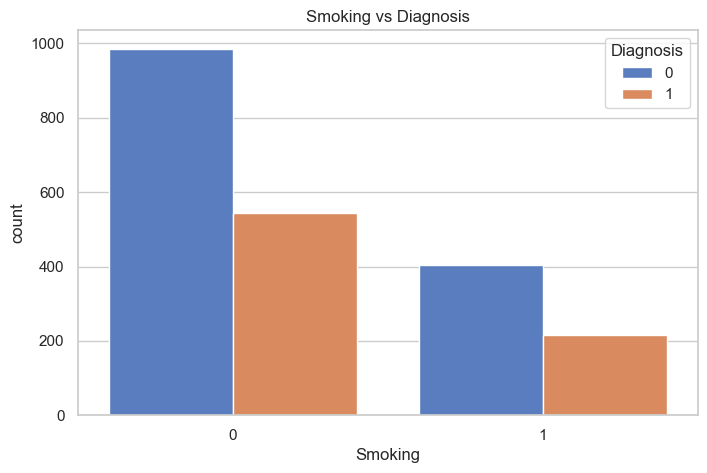

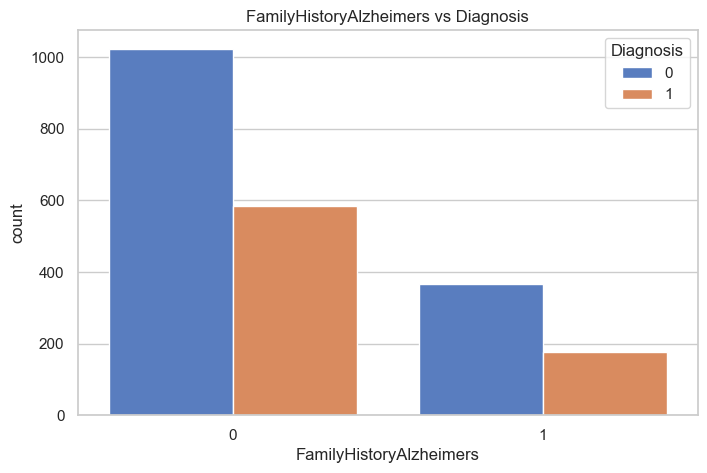

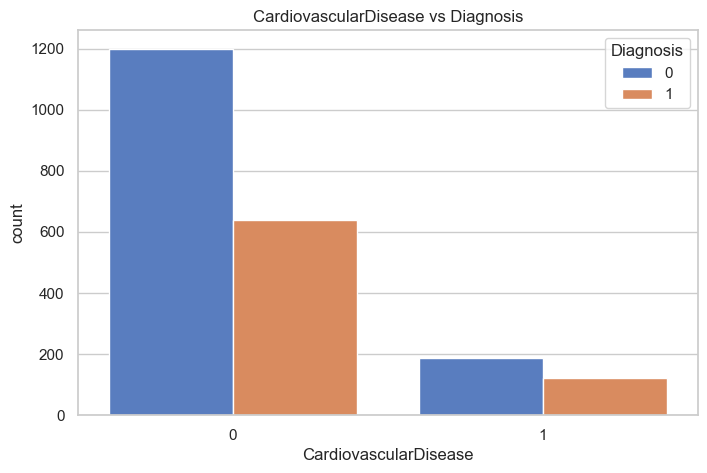

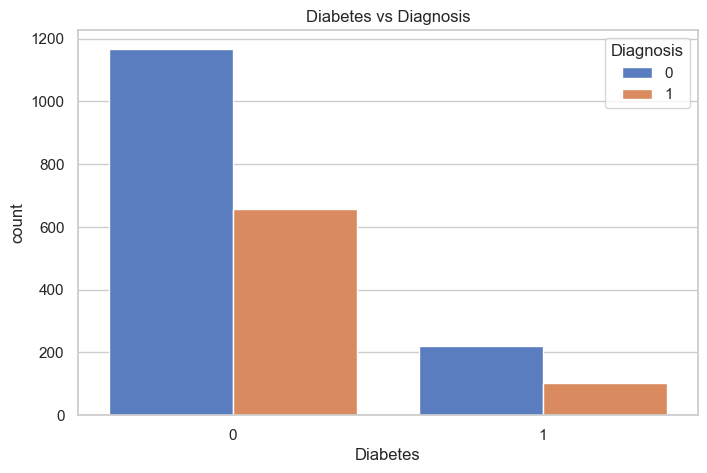

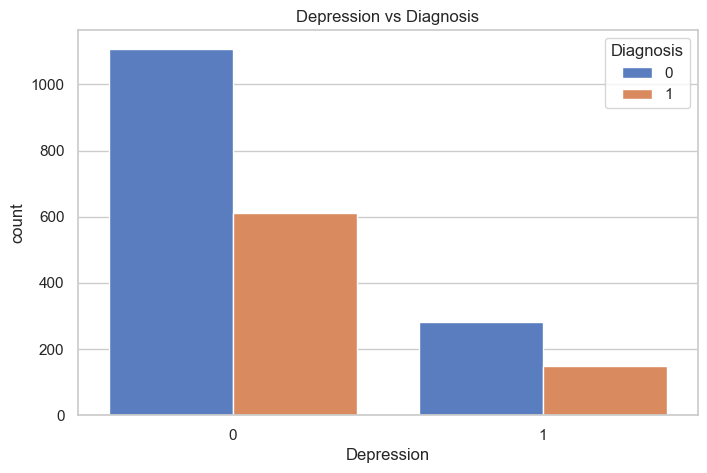

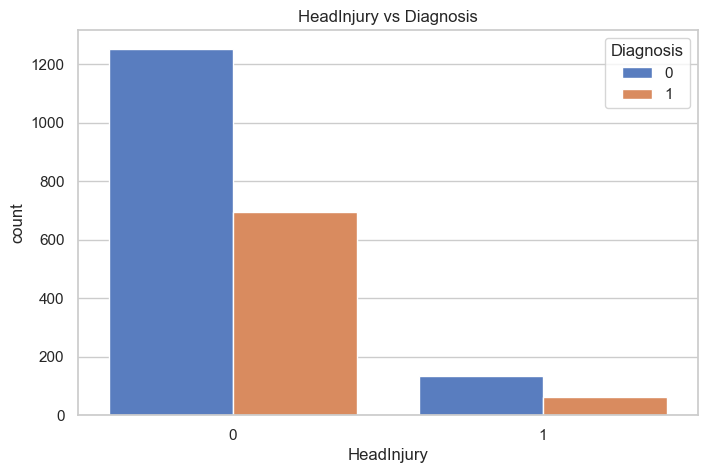

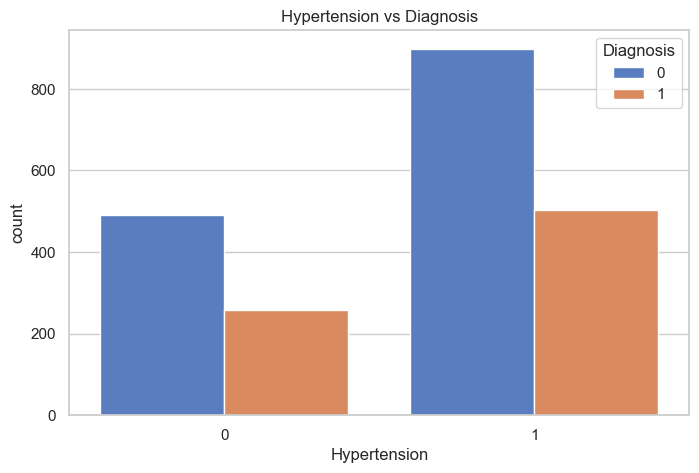

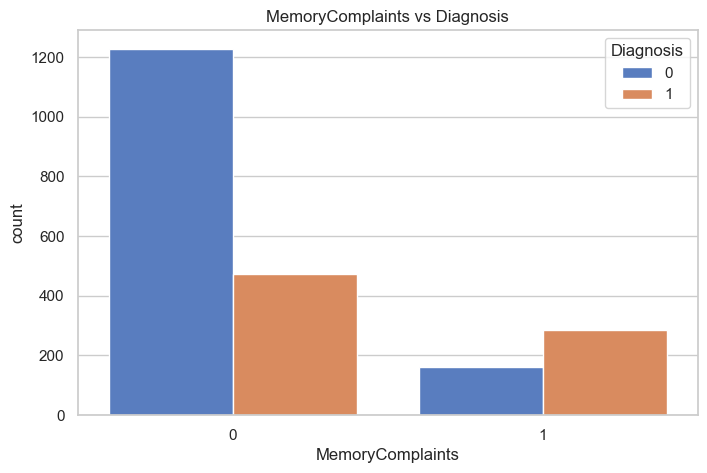

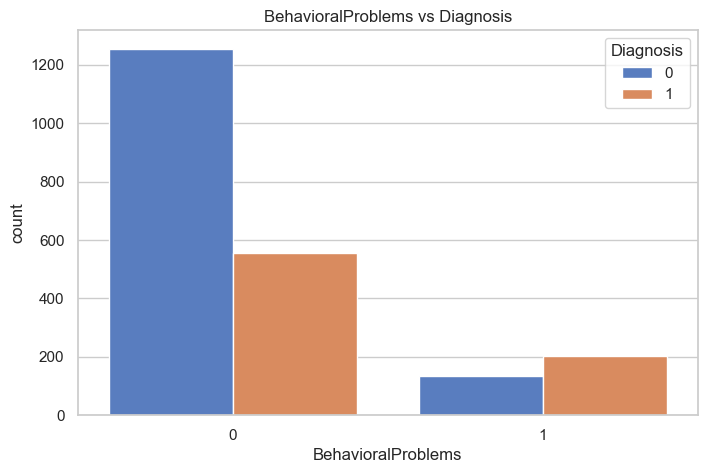

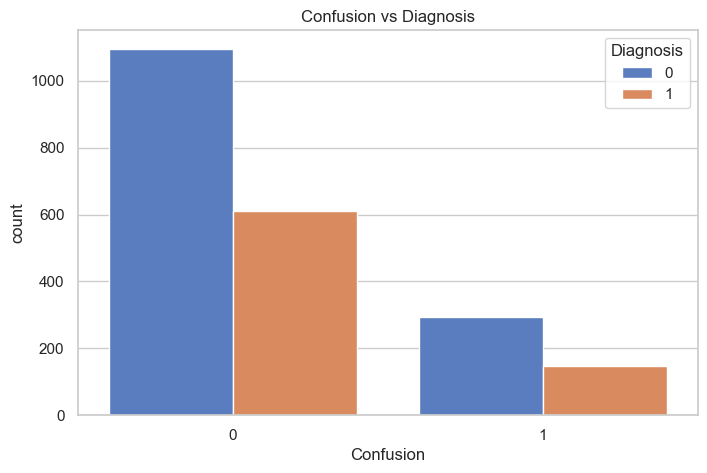

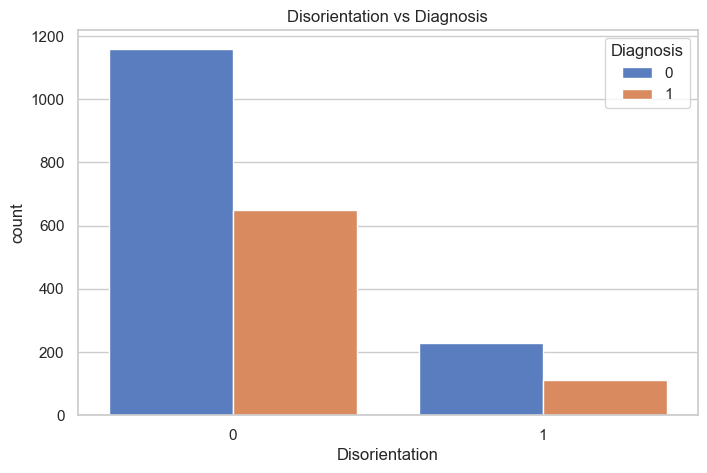

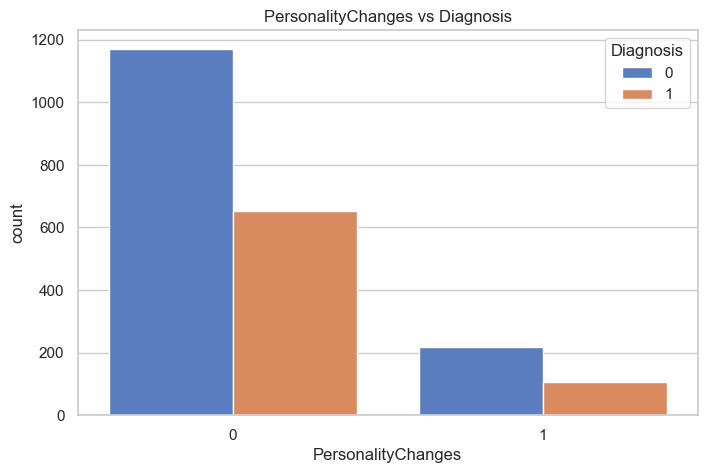

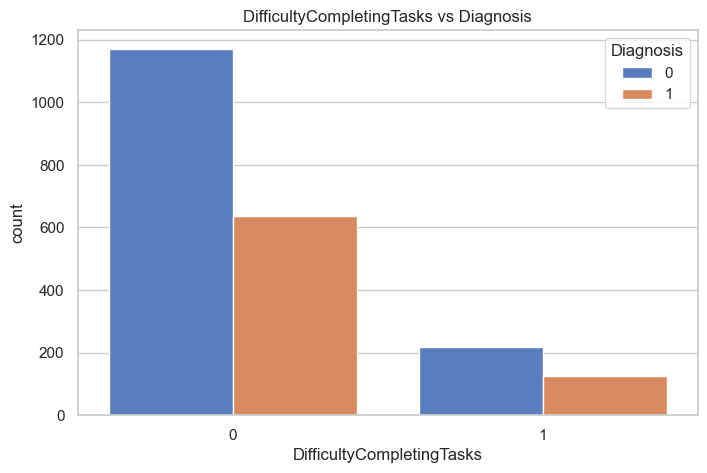

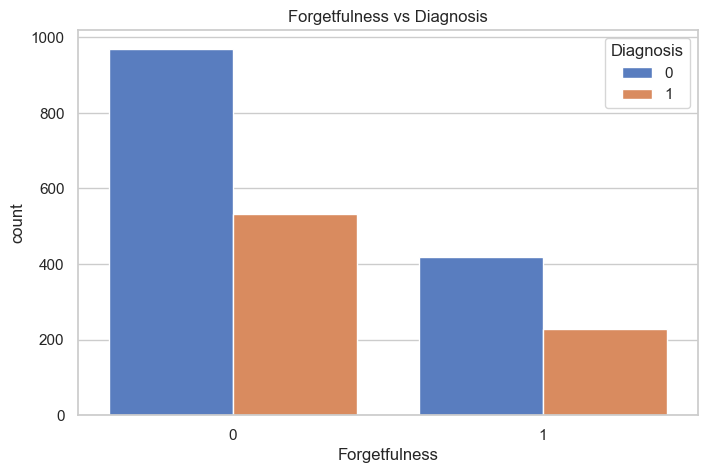

In [8]:
sns.set(style="whitegrid")
data = DF_Alzheimer
target_column = "Diagnosis"

numerical_features = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
                      'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
                      'PhysicalActivityScore', 'DietQuality', 'SleepQuality',"AlcoholConsumption",
                      "Lifestyle","MedicalHistory", "Health_Score", "Cognitive_Health_Score",
                     "Systolic_to_Diastolic","HealthIndex","Physical_Health_Score","Cognitive_Risk",
                     "Health_Impact","Age_Interaction","Lifestyle_Factor","Cholesterol_Index","BMI_Age",
                     "Age_squared","Symptoms"]

binary_features = ['Gender', 'Ethnicity', 'Smoking', 'FamilyHistoryAlzheimers',
                   'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
                   'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation',
                   'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    plt.hexbin(data[target_column], data[feature], gridsize=30, cmap="Blues", linewidths=0.5, alpha=0.7)
    plt.colorbar(label='Density')
    plt.title(f"{feature} vs {target_column}")
    plt.show()

for feature in binary_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue=target_column, data=data, palette="muted")
    plt.title(f"{feature} vs {target_column}")
    plt.show()

**Algorithm for Feature Selection**

To select relevant features for the model, I use the Random Forest algorithm, which assigns a numerical value to each feature representing its correlation with the target feature.

In [9]:
from sklearn.ensemble import RandomForestClassifier

X = DF_Alzheimer.drop(columns=["Diagnosis"])
y = DF_Alzheimer["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances.head(25).index.tolist())

['FunctionalAssessment', 'Alzheimer_indicators', 'FunctionalAssessment_scaled', 'Cognitive_Score', 'ADL', 'ADL_scaled', 'Symptoms', 'MMSE', 'BehavioralProblems', 'MemoryComplaints', 'MMSE_scaled', 'Low_ADL', 'High_MMSE', 'Health_Score', 'Lifestyle', 'Triglycerides_scaled', 'SleepQuality', 'SleepQuality_Scaled', 'DietQuality', 'BMI_scaled', 'Physical_Health', 'Lifestyle_Quality', 'Cholesterol_Index', 'PhysicalActivityScore', 'CholesterolTotal']


Now, I can select the most relevant characteristics to create a **feature vector**. I use the **hold-out** method to separate the data into two sets: one for training and the other for evaluation. 

In [10]:
Features = ["Cognitive_Risk","Symptoms","Low_ADL","Alzheimer_indicators","FunctionalAssessment_scaled",
            "FunctionalAssessment","ADL","ADL_scaled","High_MMSE","MemoryComplaints","MMSE","MMSE_scaled","BehavioralProblems",
           "Cognitive_Score","Health_Score"]

X = DF_Alzheimer[Features]
Y = DF_Alzheimer["Diagnosis"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

**Neural Netowrk Algorithm**

For this project, I use a simple **Artificial Neural Network (ANN)** model with one input layer, two hidden layers, and one output layer. To reduce computational complexity, I minimize the number of neurons. I adjust the learning rate and apply L1 regularization to prevent overfitting. The binary cross-entropy loss function is used to optimize the model, as this is a classification problem. I train the model for 250 epochs to achieve efficient learning. This architecture ensures strong machine learning performance with a simple structure.

In [11]:
α = 8e-4
λ1 = 5e-3
epochs = 200


model = kr.Sequential([
    kr.layers.Input(shape=(len(Features),)),  
    kr.layers.Dense(5, activation="relu"),  
    kr.layers.Dense(5, activation="relu", kernel_regularizer=regularizers.l1(λ1)),  
    kr.layers.Dense(1, activation="sigmoid")
])


optimizer = kr.optimizers.Adam(learning_rate = α)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=epochs, verbose = 0, validation_data=(X_test, Y_test))

**Learning Curve**

I plot the learning history of the model, and the graph shows better performance for the validation data, indicating successful prevention of overfitting.

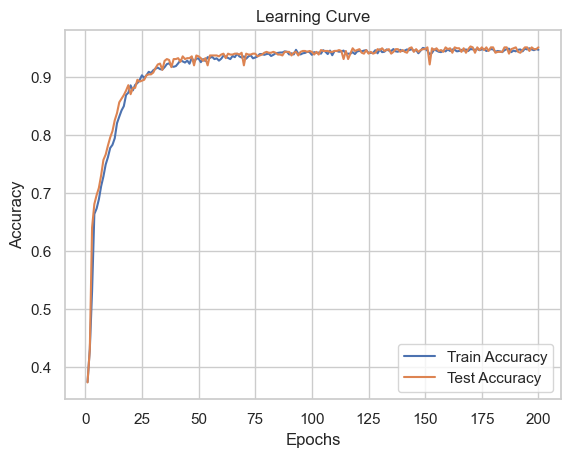

In [12]:
ax1 = plt.subplot(1, 1, 1)
sns.lineplot(x=range(1, len(history.history["accuracy"]) + 1), y=history.history["accuracy"], label="Train Accuracy", ax=ax1)
sns.lineplot(x=range(1, len(history.history["val_accuracy"]) + 1), y=history.history["val_accuracy"], label="Test Accuracy", ax=ax1)
ax1.set_title("Learning Curve")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend()

**Metrics**

The code prints the sizes of the training and test datasets, calculates the final accuracy, and evaluates the model's performance using multiple metrics. It computes accuracy, F1 score, recall (sensitivity), and precision using the `accuracy_score`, `f1_score`, `recall_score`, and `precision_score` functions from `sklearn.metrics`.

In [13]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print("Size of train dataset:", round(len(DF_Alzheimer) * 0.7))
print("Size of test dataset:", round(len(DF_Alzheimer) * 0.3))
print("Final Accuracy:", round(accuracy_score(Y_test, y_pred) * 100, 2))
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
sensitivity = recall 
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall (Sensitivity): {sensitivity}")
print(f"Precision: {precision}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Size of train dataset: 1504
Size of test dataset: 645
Final Accuracy: 95.04
Accuracy: 0.9503875968992248
F1 Score: 0.9279279279279279
Recall (Sensitivity): 0.9279279279279279
Precision: 0.9279279279279279


**Confusion Matrix**

I present a confusion matrix to evaluate the performance of the classification model. It visualizes the matrix with a heatmap using `matplotlib` and `seaborn`. The plot shows the predicted labels on the x-axis and the true labels on the y-axis.


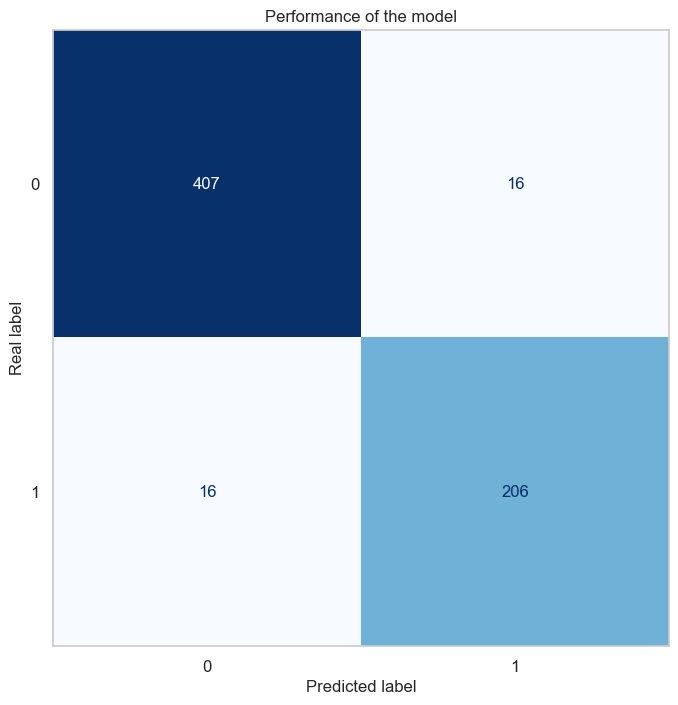

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
ax.set_title('Performance of the model')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Real label')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.yticks(ticks=[0, 1], labels=['0', '1'])
ax.grid(False)

**Conclusions**

The development of a neural network capable of diagnosing Alzheimer's in patients using raw and engineered health indicators has been successfully achieved. The model demonstrated impressive performance, with an accuracy of **95.04%**, indicating its potential for reliable and accurate diagnosis. This low error rate highlights the effectiveness of the chosen features and the neural network architecture in identifying Alzheimer's in patients. Notably, this approach does not require brain scanning images, making it a cost-effective and accessible solution for early detection. Furthermore, the simple architecture of the artificial neural network (ANN) allows for easy instrumentalization, making it a practical tool for deployment in real-world clinical settings. The results suggest that this model could be a valuable asset for healthcare professionals, supporting physicians in early diagnosis without the need for advanced imaging technologies.

